In [11]:
import os
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data


data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [74]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))


Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [3]:
input_size = 784
hidden_layer_size1 = 20
hidden_layer_size2 = 10
output_layer_size = 10
batch_size = 16,32

In [32]:
def new_layer(input,number_inputs,number_outputs,bias=True):
    weights = tf.Variable(tf.random_normal((number_inputs,number_outputs),dtype = tf.float64))
    logits = tf.matmul(input,weights);
    if bias:
        biases = tf.Variable(tf.zeros((1,number_outputs),dtype = tf.float64))
        logits += biases
    return logits

        
    
    

In [42]:
input = tf.placeholder(tf.float64,[None,input_size])
output = tf.placeholder(tf.float64,[None, output_layer_size])

hidden_layer1 = new_layer(input, input_size, hidden_layer_size1, bias=False)

hidden_layer2 = new_layer(tf.nn.relu(hidden_layer1), hidden_layer_size1, hidden_layer_size2, bias=False)

output_layer = new_layer(tf.sigmoid(hidden_layer2), hidden_layer_size2, output_layer_size, bias=True)

nn_output = tf.nn.softmax(output_layer)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = output_layer, labels = output)
cost=tf.reduce_sum(cross_entropy)
optimizer = tf.train.AdagradOptimizer(0.3).minimize(cost)

true_output = tf.argmax(output,axis = 1)
output_nn = tf.argmax(nn_output, axis = 1)

correct_prediction = tf.equal(output_nn, true_output)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess = tf.Session()
sess.run(tf.global_variables_initializer())
iter_count = 0
def train(num_iterations):
    global iter_count
    
    for i in range(iter_count,iter_count+num_iterations):
        input_next_batch, label_next_batch = data.train.next_batch(batch_size)
        feed_dict_train = {input:input_next_batch, output:label_next_batch}
        sess.run(optimizer,feed_dict=feed_dict_train)
        if i%100 == 0:
            print("Iteration {}, Accuracy {0:.4f}%".format(i+1,sess.run(accuracy, feed_dict=feed_dict_train)*100))
    iter_count += num_iterations

train(10)
feed_dict_test = {input:data.train.images, output:data.train.labels}
print("Accuracy {}%".format(sess.run(accuracy, feed_dict= feed_dict_test)*100))
            

    


Iteration 1, Accuracy 0.046875
Accuracy 10.549090802669525%


In [43]:
train(200)
print("Accuracy {}%".format(sess.run(accuracy, feed_dict= feed_dict_test)*100))

Iteration 101, Accuracy 0.40625
Iteration 201, Accuracy 0.5625
Accuracy 44.47090923786163%


In [44]:
train(200)
print("Accuracy {}%".format(sess.run(accuracy, feed_dict= feed_dict_test)*100))

Iteration 301, Accuracy 0.59375
Iteration 401, Accuracy 0.671875
Accuracy 57.15818405151367%


In [45]:
train(1000)
print("Accuracy {}%".format(sess.run(accuracy, feed_dict= feed_dict_test)*100))

Iteration 501, Accuracy 0.71875
Iteration 601, Accuracy 0.859375
Iteration 701, Accuracy 0.640625
Iteration 801, Accuracy 0.828125
Iteration 901, Accuracy 0.828125
Iteration 1001, Accuracy 0.8125
Iteration 1101, Accuracy 0.828125
Iteration 1201, Accuracy 0.859375
Iteration 1301, Accuracy 0.890625
Iteration 1401, Accuracy 0.828125
Accuracy 83.41636657714844%


In [46]:
train(2000)
print("Accuracy {}%".format(sess.run(accuracy, feed_dict= feed_dict_test)*100))

Iteration 1501, Accuracy 0.875
Iteration 1601, Accuracy 0.828125
Iteration 1701, Accuracy 0.84375
Iteration 1801, Accuracy 0.859375
Iteration 1901, Accuracy 0.9375
Iteration 2001, Accuracy 0.8125
Iteration 2101, Accuracy 0.9375
Iteration 2201, Accuracy 0.90625
Iteration 2301, Accuracy 0.921875
Iteration 2401, Accuracy 0.921875
Iteration 2501, Accuracy 0.875
Iteration 2601, Accuracy 0.890625
Iteration 2701, Accuracy 0.875
Iteration 2801, Accuracy 0.953125
Iteration 2901, Accuracy 0.921875
Iteration 3001, Accuracy 0.890625
Iteration 3101, Accuracy 0.9375
Iteration 3201, Accuracy 0.921875
Iteration 3301, Accuracy 0.9375
Iteration 3401, Accuracy 0.953125
Accuracy 90.46363830566406%


In [47]:
train(10000)
print("Accuracy {}%".format(sess.run(accuracy, feed_dict= feed_dict_test)*100))

Iteration 3501, Accuracy 0.890625
Iteration 3601, Accuracy 0.9375
Iteration 3701, Accuracy 0.921875
Iteration 3801, Accuracy 0.984375
Iteration 3901, Accuracy 0.9375
Iteration 4001, Accuracy 0.9375
Iteration 4101, Accuracy 0.953125
Iteration 4201, Accuracy 0.921875
Iteration 4301, Accuracy 0.875
Iteration 4401, Accuracy 0.953125
Iteration 4501, Accuracy 0.90625
Iteration 4601, Accuracy 0.921875
Iteration 4701, Accuracy 0.9375
Iteration 4801, Accuracy 0.921875
Iteration 4901, Accuracy 0.984375
Iteration 5001, Accuracy 0.890625
Iteration 5101, Accuracy 0.953125
Iteration 5201, Accuracy 0.9375
Iteration 5301, Accuracy 0.875
Iteration 5401, Accuracy 0.984375
Iteration 5501, Accuracy 0.9375
Iteration 5601, Accuracy 0.90625
Iteration 5701, Accuracy 0.96875
Iteration 5801, Accuracy 0.953125
Iteration 5901, Accuracy 0.953125
Iteration 6001, Accuracy 0.984375
Iteration 6101, Accuracy 0.96875
Iteration 6201, Accuracy 0.90625
Iteration 6301, Accuracy 0.90625
Iteration 6401, Accuracy 0.953125
Iter

In [55]:
train(10000)
print("Accuracy {}%".format(sess.run(accuracy, feed_dict= feed_dict_test)*100))

Iteration 13501, Accuracy 0.984375
Iteration 13601, Accuracy 0.9375
Iteration 13701, Accuracy 0.953125
Iteration 13801, Accuracy 0.921875
Iteration 13901, Accuracy 0.96875
Iteration 14001, Accuracy 0.9375
Iteration 14101, Accuracy 0.921875
Iteration 14201, Accuracy 0.96875
Iteration 14301, Accuracy 0.984375
Iteration 14401, Accuracy 0.984375
Iteration 14501, Accuracy 0.984375
Iteration 14601, Accuracy 0.953125
Iteration 14701, Accuracy 0.953125
Iteration 14801, Accuracy 0.984375
Iteration 14901, Accuracy 0.953125
Iteration 15001, Accuracy 0.921875
Iteration 15101, Accuracy 0.9375
Iteration 15201, Accuracy 0.921875
Iteration 15301, Accuracy 0.984375
Iteration 15401, Accuracy 0.96875
Iteration 15501, Accuracy 0.984375
Iteration 15601, Accuracy 0.953125
Iteration 15701, Accuracy 0.96875
Iteration 15801, Accuracy 0.984375
Iteration 15901, Accuracy 0.96875
Iteration 16001, Accuracy 0.96875
Iteration 16101, Accuracy 0.953125
Iteration 16201, Accuracy 0.9375
Iteration 16301, Accuracy 1.0
Iter

9
9


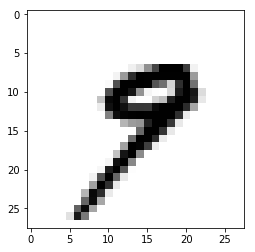

In [71]:
num = 53167
print(sess.run(tf.argmax(data.train.labels[num])))
print(sess.run(output_nn,feed_dict={input:[data.train.images[num]]})[0])
image1 = data.train.images[num].reshape((28,28))  
from matplotlib import pyplot as plt
plt.imshow(image1, cmap=plt.cm.binary)


In [72]:
train(10000)
print("Accuracy {}%".format(sess.run(accuracy, feed_dict= feed_dict_test)*100))

Iteration 23501, Accuracy 0.984375
Iteration 23601, Accuracy 0.96875
Iteration 23701, Accuracy 1.0
Iteration 23801, Accuracy 0.921875
Iteration 23901, Accuracy 0.984375
Iteration 24001, Accuracy 0.953125
Iteration 24101, Accuracy 0.96875
Iteration 24201, Accuracy 0.953125
Iteration 24301, Accuracy 0.9375
Iteration 24401, Accuracy 0.984375
Iteration 24501, Accuracy 0.984375
Iteration 24601, Accuracy 0.96875
Iteration 24701, Accuracy 0.984375
Iteration 24801, Accuracy 1.0
Iteration 24901, Accuracy 1.0
Iteration 25001, Accuracy 0.96875
Iteration 25101, Accuracy 0.9375
Iteration 25201, Accuracy 0.96875
Iteration 25301, Accuracy 0.96875
Iteration 25401, Accuracy 0.984375
Iteration 25501, Accuracy 0.984375
Iteration 25601, Accuracy 0.96875
Iteration 25701, Accuracy 0.96875
Iteration 25801, Accuracy 0.953125
Iteration 25901, Accuracy 0.984375
Iteration 26001, Accuracy 1.0
Iteration 26101, Accuracy 0.953125
Iteration 26201, Accuracy 0.984375
Iteration 26301, Accuracy 0.96875
Iteration 26401, A

In [73]:
train(20000)
print("Accuracy {}%".format(sess.run(accuracy, feed_dict= feed_dict_test)*100))

Iteration 33501, Accuracy 0.953125
Iteration 33601, Accuracy 0.953125
Iteration 33701, Accuracy 0.96875
Iteration 33801, Accuracy 1.0
Iteration 33901, Accuracy 0.953125
Iteration 34001, Accuracy 0.953125
Iteration 34101, Accuracy 0.984375
Iteration 34201, Accuracy 0.953125
Iteration 34301, Accuracy 0.984375
Iteration 34401, Accuracy 0.953125
Iteration 34501, Accuracy 1.0
Iteration 34601, Accuracy 1.0
Iteration 34701, Accuracy 0.984375
Iteration 34801, Accuracy 0.984375
Iteration 34901, Accuracy 1.0
Iteration 35001, Accuracy 0.96875
Iteration 35101, Accuracy 0.96875
Iteration 35201, Accuracy 0.96875
Iteration 35301, Accuracy 0.9375
Iteration 35401, Accuracy 0.984375
Iteration 35501, Accuracy 0.96875
Iteration 35601, Accuracy 1.0
Iteration 35701, Accuracy 0.984375
Iteration 35801, Accuracy 0.984375
Iteration 35901, Accuracy 0.984375
Iteration 36001, Accuracy 0.984375
Iteration 36101, Accuracy 0.984375
Iteration 36201, Accuracy 1.0
Iteration 36301, Accuracy 0.953125
Iteration 36401, Accur

In [75]:
train(20000)
print("Accuracy {0:.4f}%".format(sess.run(accuracy, feed_dict= feed_dict_test)*100))

Iteration 53501, Accuracy 1.0
Iteration 53601, Accuracy 0.984375
Iteration 53701, Accuracy 1.0
Iteration 53801, Accuracy 0.984375
Iteration 53901, Accuracy 1.0
Iteration 54001, Accuracy 0.984375
Iteration 54101, Accuracy 0.953125
Iteration 54201, Accuracy 1.0
Iteration 54301, Accuracy 1.0
Iteration 54401, Accuracy 1.0
Iteration 54501, Accuracy 0.984375
Iteration 54601, Accuracy 1.0
Iteration 54701, Accuracy 1.0
Iteration 54801, Accuracy 0.984375
Iteration 54901, Accuracy 0.984375
Iteration 55001, Accuracy 1.0
Iteration 55101, Accuracy 1.0
Iteration 55201, Accuracy 0.984375
Iteration 55301, Accuracy 1.0
Iteration 55401, Accuracy 0.984375
Iteration 55501, Accuracy 1.0
Iteration 55601, Accuracy 1.0
Iteration 55701, Accuracy 0.984375
Iteration 55801, Accuracy 0.96875
Iteration 55901, Accuracy 0.96875
Iteration 56001, Accuracy 0.984375
Iteration 56101, Accuracy 0.953125
Iteration 56201, Accuracy 0.984375
Iteration 56301, Accuracy 0.984375
Iteration 56401, Accuracy 1.0
Iteration 56501, Accur

In [76]:
train(20000)
print("Accuracy {0:.4f}%".format(sess.run(accuracy, feed_dict= feed_dict_test)*100))

Iteration 73501, Accuracy 1.0
Iteration 73601, Accuracy 1.0
Iteration 73701, Accuracy 1.0
Iteration 73801, Accuracy 0.984375
Iteration 73901, Accuracy 0.984375
Iteration 74001, Accuracy 1.0
Iteration 74101, Accuracy 0.984375
Iteration 74201, Accuracy 0.953125
Iteration 74301, Accuracy 1.0
Iteration 74401, Accuracy 1.0
Iteration 74501, Accuracy 1.0
Iteration 74601, Accuracy 0.984375
Iteration 74701, Accuracy 0.984375
Iteration 74801, Accuracy 0.984375
Iteration 74901, Accuracy 1.0
Iteration 75001, Accuracy 0.984375
Iteration 75101, Accuracy 1.0
Iteration 75201, Accuracy 0.96875
Iteration 75301, Accuracy 0.984375
Iteration 75401, Accuracy 1.0
Iteration 75501, Accuracy 1.0
Iteration 75601, Accuracy 1.0
Iteration 75701, Accuracy 1.0
Iteration 75801, Accuracy 1.0
Iteration 75901, Accuracy 1.0
Iteration 76001, Accuracy 0.96875
Iteration 76101, Accuracy 0.984375
Iteration 76201, Accuracy 1.0
Iteration 76301, Accuracy 1.0
Iteration 76401, Accuracy 0.984375
Iteration 76501, Accuracy 1.0
Iterati

In [77]:
train(80000)
print("Accuracy {0:.4f}%".format(sess.run(accuracy, feed_dict= feed_dict_test)*100))

Iteration 93501, Accuracy 0.984375
Iteration 93601, Accuracy 1.0
Iteration 93701, Accuracy 0.984375
Iteration 93801, Accuracy 0.984375
Iteration 93901, Accuracy 1.0
Iteration 94001, Accuracy 1.0
Iteration 94101, Accuracy 0.984375
Iteration 94201, Accuracy 0.984375
Iteration 94301, Accuracy 1.0
Iteration 94401, Accuracy 0.984375
Iteration 94501, Accuracy 1.0
Iteration 94601, Accuracy 0.984375
Iteration 94701, Accuracy 1.0
Iteration 94801, Accuracy 0.984375
Iteration 94901, Accuracy 1.0
Iteration 95001, Accuracy 0.96875
Iteration 95101, Accuracy 1.0
Iteration 95201, Accuracy 1.0
Iteration 95301, Accuracy 0.984375
Iteration 95401, Accuracy 1.0
Iteration 95501, Accuracy 1.0
Iteration 95601, Accuracy 0.984375
Iteration 95701, Accuracy 1.0
Iteration 95801, Accuracy 1.0
Iteration 95901, Accuracy 1.0
Iteration 96001, Accuracy 1.0
Iteration 96101, Accuracy 1.0
Iteration 96201, Accuracy 0.984375
Iteration 96301, Accuracy 1.0
Iteration 96401, Accuracy 1.0
Iteration 96501, Accuracy 1.0
Iteration 9

Iteration 118501, Accuracy 1.0
Iteration 118601, Accuracy 1.0
Iteration 118701, Accuracy 0.984375
Iteration 118801, Accuracy 1.0
Iteration 118901, Accuracy 1.0
Iteration 119001, Accuracy 0.96875
Iteration 119101, Accuracy 1.0
Iteration 119201, Accuracy 1.0
Iteration 119301, Accuracy 1.0
Iteration 119401, Accuracy 1.0
Iteration 119501, Accuracy 0.984375
Iteration 119601, Accuracy 0.96875
Iteration 119701, Accuracy 1.0
Iteration 119801, Accuracy 1.0
Iteration 119901, Accuracy 1.0
Iteration 120001, Accuracy 1.0
Iteration 120101, Accuracy 0.984375
Iteration 120201, Accuracy 0.984375
Iteration 120301, Accuracy 0.984375
Iteration 120401, Accuracy 0.984375
Iteration 120501, Accuracy 1.0
Iteration 120601, Accuracy 0.96875
Iteration 120701, Accuracy 1.0
Iteration 120801, Accuracy 1.0
Iteration 120901, Accuracy 1.0
Iteration 121001, Accuracy 1.0
Iteration 121101, Accuracy 0.984375
Iteration 121201, Accuracy 1.0
Iteration 121301, Accuracy 1.0
Iteration 121401, Accuracy 1.0
Iteration 121501, Accur

Iteration 143301, Accuracy 1.0
Iteration 143401, Accuracy 1.0
Iteration 143501, Accuracy 1.0
Iteration 143601, Accuracy 1.0
Iteration 143701, Accuracy 0.984375
Iteration 143801, Accuracy 1.0
Iteration 143901, Accuracy 0.984375
Iteration 144001, Accuracy 0.984375
Iteration 144101, Accuracy 1.0
Iteration 144201, Accuracy 1.0
Iteration 144301, Accuracy 0.984375
Iteration 144401, Accuracy 1.0
Iteration 144501, Accuracy 0.96875
Iteration 144601, Accuracy 1.0
Iteration 144701, Accuracy 1.0
Iteration 144801, Accuracy 0.984375
Iteration 144901, Accuracy 0.984375
Iteration 145001, Accuracy 0.984375
Iteration 145101, Accuracy 1.0
Iteration 145201, Accuracy 1.0
Iteration 145301, Accuracy 0.984375
Iteration 145401, Accuracy 1.0
Iteration 145501, Accuracy 1.0
Iteration 145601, Accuracy 0.984375
Iteration 145701, Accuracy 1.0
Iteration 145801, Accuracy 1.0
Iteration 145901, Accuracy 1.0
Iteration 146001, Accuracy 1.0
Iteration 146101, Accuracy 0.96875
Iteration 146201, Accuracy 0.984375
Iteration 14

Iteration 168301, Accuracy 0.96875
Iteration 168401, Accuracy 0.984375
Iteration 168501, Accuracy 1.0
Iteration 168601, Accuracy 0.984375
Iteration 168701, Accuracy 0.984375
Iteration 168801, Accuracy 0.984375
Iteration 168901, Accuracy 0.984375
Iteration 169001, Accuracy 1.0
Iteration 169101, Accuracy 0.953125
Iteration 169201, Accuracy 0.984375
Iteration 169301, Accuracy 0.984375
Iteration 169401, Accuracy 1.0
Iteration 169501, Accuracy 1.0
Iteration 169601, Accuracy 0.984375
Iteration 169701, Accuracy 0.984375
Iteration 169801, Accuracy 0.984375
Iteration 169901, Accuracy 0.984375
Iteration 170001, Accuracy 1.0
Iteration 170101, Accuracy 1.0
Iteration 170201, Accuracy 1.0
Iteration 170301, Accuracy 1.0
Iteration 170401, Accuracy 1.0
Iteration 170501, Accuracy 1.0
Iteration 170601, Accuracy 1.0
Iteration 170701, Accuracy 0.984375
Iteration 170801, Accuracy 1.0
Iteration 170901, Accuracy 1.0
Iteration 171001, Accuracy 1.0
Iteration 171101, Accuracy 0.984375
Iteration 171201, Accuracy 